In [1]:
import os
import cv2
import time
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [2]:
files = ['banana-edible', 'banana-inedible', 'bread-edible', 'bread-inedible','donut-edible','donut-inedible','mango-edible', 'mango-inedible', 'pizza-edible','pizza-inedible', 'rice-edible', 'rice-inedible']
file_path = "D:\TITO\Documents\Deep-learning\FOODITION-FOOD-EDIBLE-CLASSIFICATION\dataset\{}"
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(file_path.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)
        if i.endswith('.png'):
            data[col].append(i)
        if i.endswith('.jpeg'):
            data[col].append(i)


In [3]:
data_count = {key: len(value) for key, value in data.items()}
total_data_count = sum(data_count.values())
print(data_count)


{'banana-edible': 513, 'banana-inedible': 600, 'bread-edible': 742, 'bread-inedible': 482, 'donut-edible': 708, 'donut-inedible': 526, 'mango-edible': 542, 'mango-inedible': 544, 'pizza-edible': 426, 'pizza-inedible': 560, 'rice-edible': 593, 'rice-inedible': 558}


In [4]:
sample_size = total_data_count
width = 160
height = 160

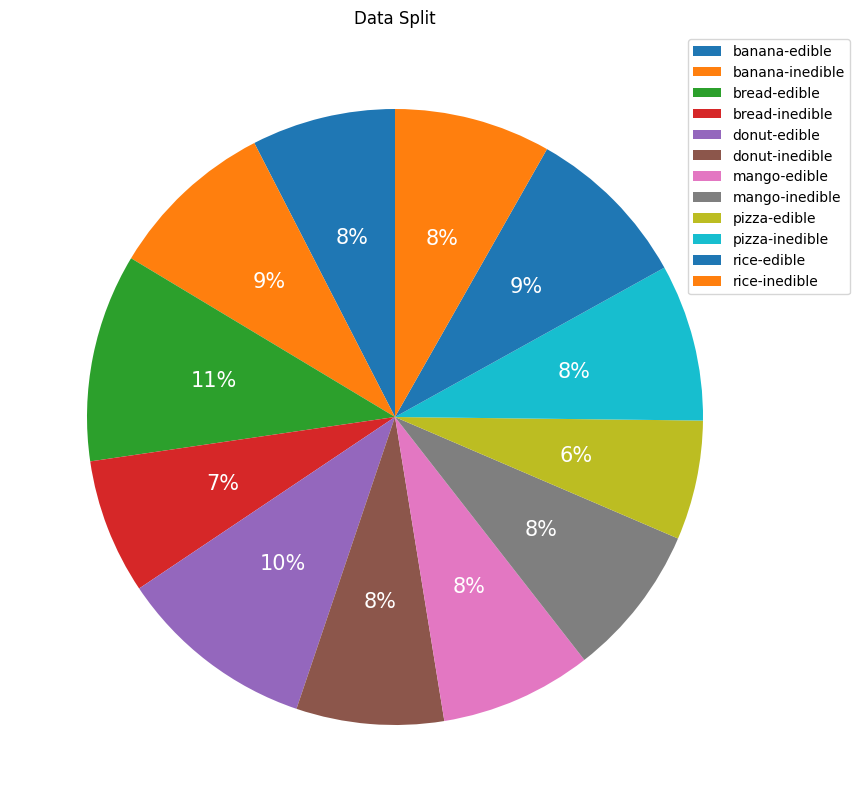

In [5]:
sizes = [len(data['banana-edible']), len(data['banana-inedible']), len(data['bread-edible']), len(data['bread-inedible']), len(data['donut-edible']), len(data['donut-inedible']), 
         len(data['mango-edible']), len(data['mango-inedible']), len(data['pizza-edible']), len(data['pizza-inedible']), len(data['rice-edible']), len(data['rice-inedible'])]


plt.figure(figsize=(10, 10), dpi=100)
plt.pie(x=sizes, autopct='%1.0f%%', shadow=False, textprops={'color': "w", "fontsize": 15}, startangle=90)
plt.legend(files, bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [6]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(file_path.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class rice-inedible
Calculate Time 59.23465


In [7]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(6794, 160, 160, 3)

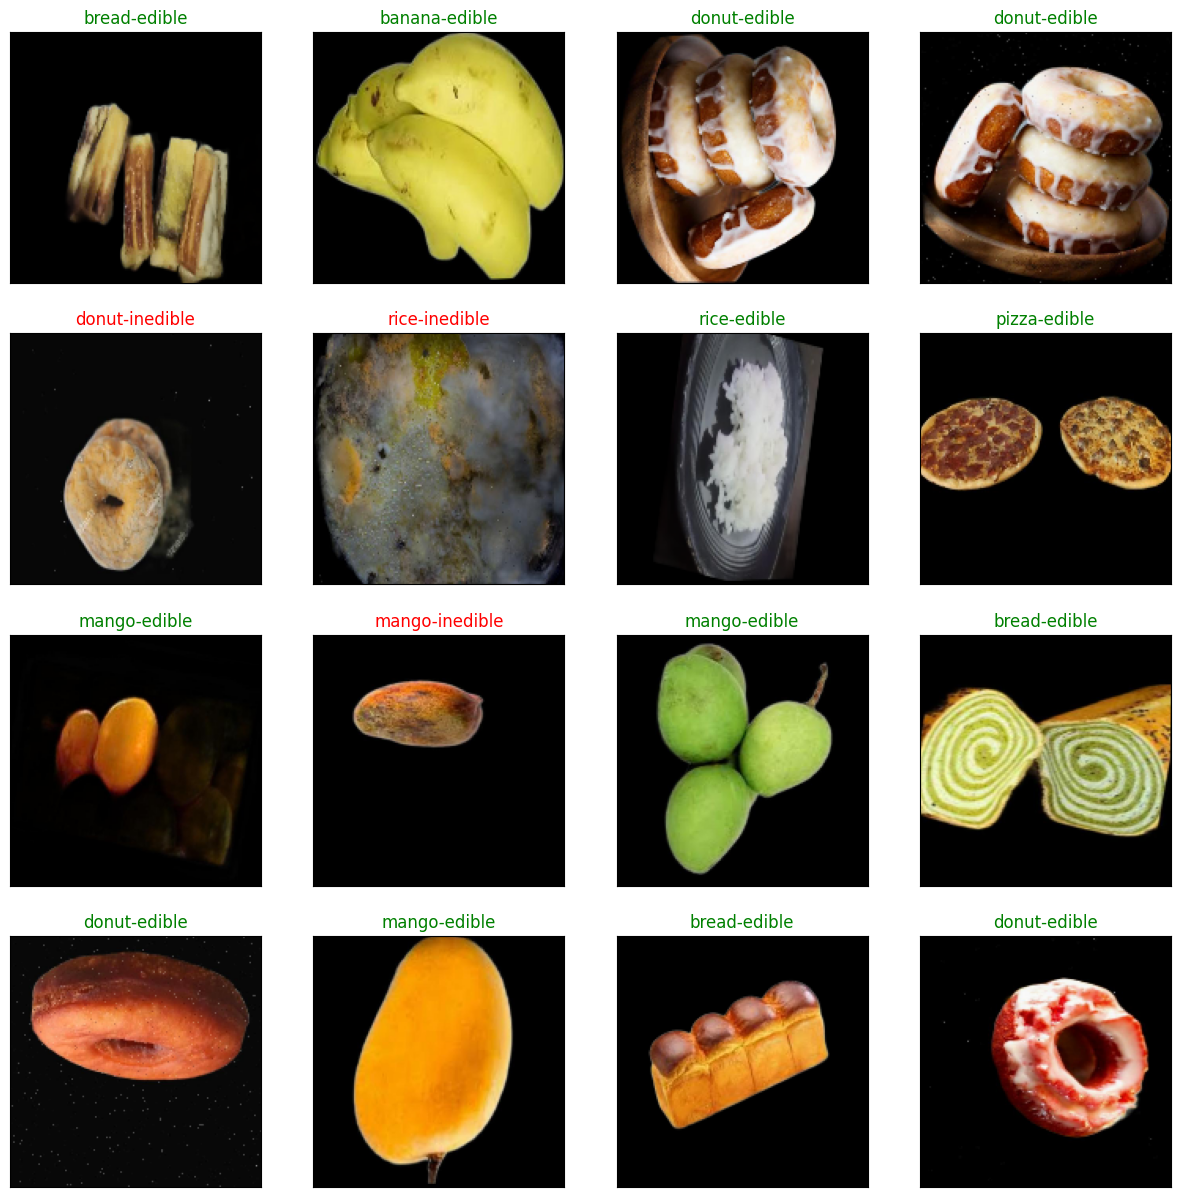

In [8]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if '-edible' in image_target[fig]:
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [10]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width, height, 3), include_top=False, weights='imagenet')
base_model.trainable = False

In [12]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(12, activation='softmax')
])

In [13]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=5,
                                                restore_best_weights=True)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

def lr_scheduler(epoch):
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[lr_callback, callback])

Epoch 1/50
149/149 [==============================] - 83s 114ms/step - loss: 1.0908 - accuracy: 0.6452 - categorical_accuracy: 0.0749 - val_loss: 0.2906 - val_accuracy: 0.9230 - val_categorical_accuracy: 0.0736 - lr: 0.0010
Epoch 2/50
149/149 [==============================] - 14s 91ms/step - loss: 0.4320 - accuracy: 0.8574 - categorical_accuracy: 0.0742 - val_loss: 0.1714 - val_accuracy: 0.9500 - val_categorical_accuracy: 0.0736 - lr: 9.0484e-04
Epoch 3/50
149/149 [==============================] - 14s 91ms/step - loss: 0.2965 - accuracy: 0.9073 - categorical_accuracy: 0.0749 - val_loss: 0.1245 - val_accuracy: 0.9681 - val_categorical_accuracy: 0.0760 - lr: 8.1873e-04
Epoch 4/50
149/149 [==============================] - 14s 91ms/step - loss: 0.2310 - accuracy: 0.9277 - categorical_accuracy: 0.0768 - val_loss: 0.1001 - val_accuracy: 0.9725 - val_categorical_accuracy: 0.0750 - lr: 7.4082e-04
Epoch 5/50
149/149 [==============================] - 14s 92ms/step - loss: 0.1822 - accuracy: 

In [15]:
if tf.config.list_physical_devices('GPU') == [] :
    print('elmao you dont have a gpu')
else:
    print('you have a gpu: ', tf.config.list_physical_devices('GPU'))

you have a gpu:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


64/64 - 4s - loss: 0.0508 - accuracy: 0.9872 - categorical_accuracy: 0.0750 - 4s/epoch - 63ms/step


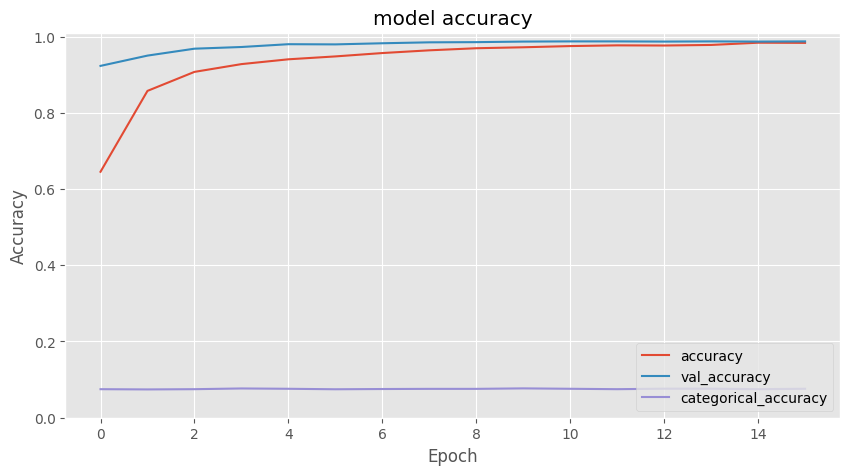

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('model accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.01])
plt.legend(loc='lower right')

test_acc = model.evaluate(test_images,  test_labels, verbose=2)

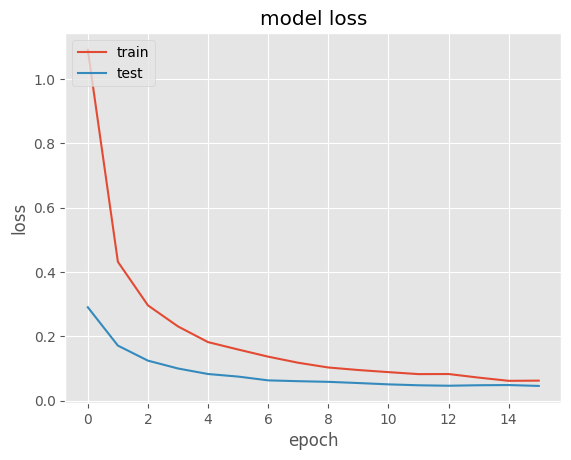

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

64/64 [==============================] - 5s 59ms/step


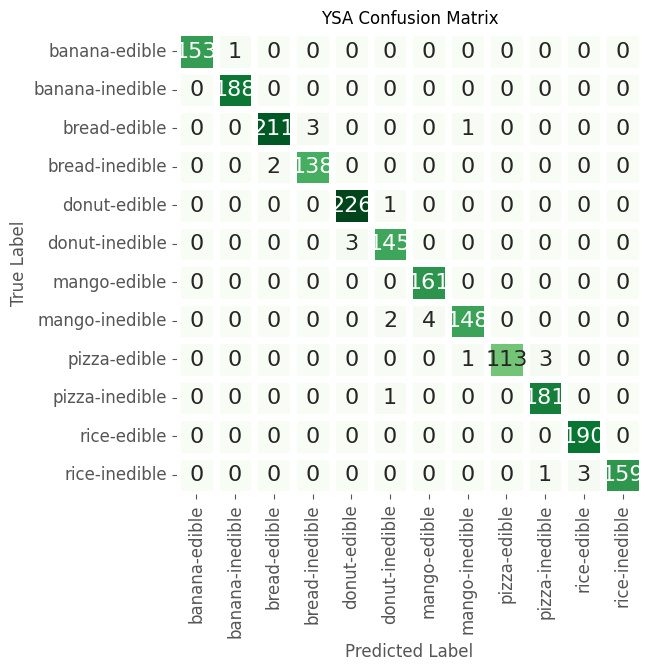

In [18]:
y_pred = model.predict(test_images)

def toClass(pred):

    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index

    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=['banana-edible', 'banana-inedible', 'bread-edible', 'bread-inedible','donut-edible','donut-inedible', 'mango-edible', 'mango-inedible', 'pizza-edible','pizza-inedible', 'rice-edible', 'rice-inedible'], 
                   index= ['banana-edible', 'banana-inedible', 'bread-edible', 'bread-inedible','donut-edible','donut-inedible', 'mango-edible', 'mango-inedible', 'pizza-edible','pizza-inedible', 'rice-edible', 'rice-inedible'], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [19]:
import sklearn.metrics as metrics

precision = metrics.precision_score(test_labels, toClass(y_pred), average='macro')
print('Precision: %f' % precision)

Precision: 0.987446


In [20]:
recall = metrics.recall_score(test_labels, toClass(y_pred), average='macro')
print('Recall: %f' % recall)

Recall: 0.986063


In [21]:
f1 = metrics.f1_score(test_labels, toClass(y_pred), average='macro')
print('F1 score: %f' % f1)

F1 score: 0.986673


In [22]:
def Prediction(test_image):

    global width, height, files, labels

    img = image.img_to_array(test_image)
    img = np.expand_dims(img, axis=0)
    img = img/255.0
    
    class_list = ['banana-edible', 'banana-inedible', 'bread-edible', 'bread-inedible','donut-edible','donut-inedible', 'mango-edible', 'mango-inedible', 'pizza-edible','pizza-inedible', 'rice-edible', 'rice-inedible'] 
    
    pred = model.predict(img)
    predicted_class = class_list[np.argmax(pred[0])]
    return predicted_class

1/1 [==============================] - 0s 30ms/step


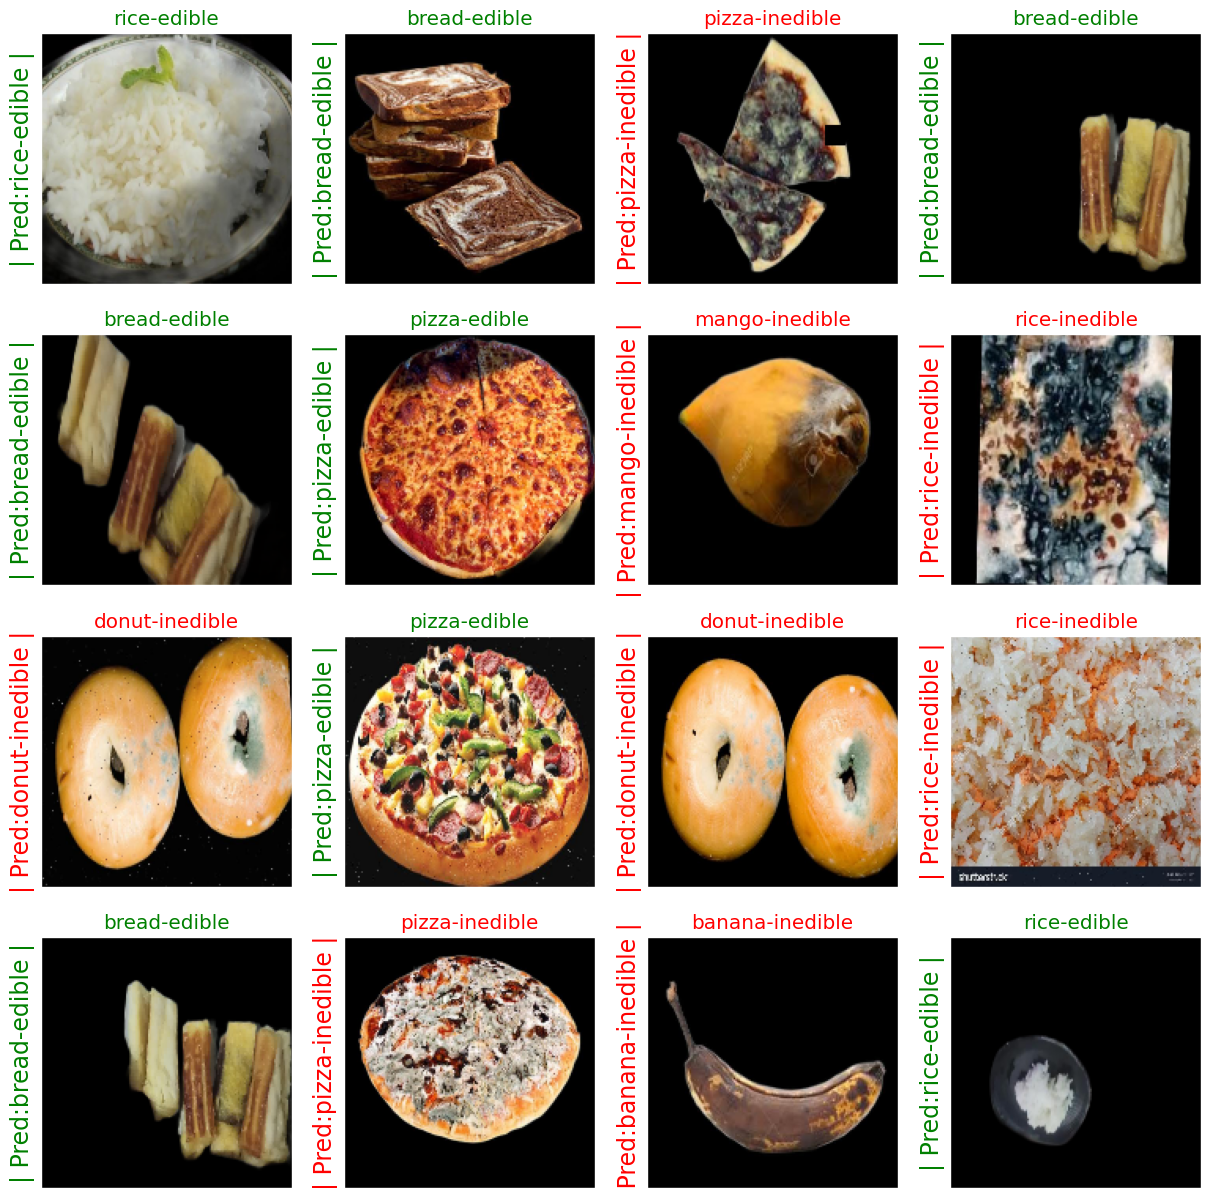

In [23]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if '-edible' in image_target[fig]:
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

1/1 [==============================] - 0s 32ms/step
Rentang hasil prediksi:
Nilai Minimum: 1.4731011e-05
Nilai Maksimum: 0.44338068
This Image belongs to class donut-inedible


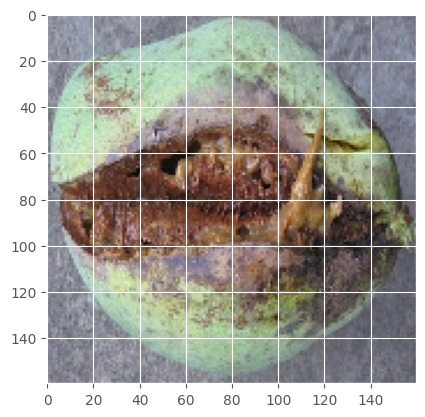

In [30]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras import utils
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk


#function to call the upload file dialog box
def upload_file():
    global img, predict_path
    f_types = [('Jpg Files', '*.jpg',), ('Png Files', '*.png'), ('All Files', '*.*')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    predict_path = filename
    img = ImageTk.PhotoImage(file=filename)
    my_w.destroy()

my_w = tk.Tk()
my_w.geometry("400x300")  
my_w.title('testing')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='test your food',width=30,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

my_w.mainloop()

img = image.load_img(predict_path, target_size=(160, 160))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalisasi gambar seperti saat melatih model

# Melakukan prediksi
classes = model.predict(x, batch_size=1)
nilai_min = np.min(classes)
nilai_max = np.max(classes)

print("Rentang hasil prediksi:")
print("Nilai Minimum:", nilai_min)
print("Nilai Maksimum:", nilai_max)

class_list = ['banana-edible', 'banana-inedible', 'bread-edible', 'bread-inedible','donut-edible','donut-inedible', 'mango-edible', 'mango-inedible', 'pizza-edible','pizza-inedible', 'rice-edible', 'rice-inedible']

predicted_class = class_list[np.argmax(classes[0])]
print('This Image belongs to class', predicted_class)

In [25]:
# model.save('d:\TITO\Documents\Deep-learning\\foodition-food-edible-classification\model6.h5')